In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [319]:
#FUNCIONES

#funcion para obtener distancias
def dist(x_d,x_r,y_d,y_r):
    dis=np.sqrt((x_d - x_r)**2 + (y_d-y_r)**2)
    return dis

#estimador Landy-Zslay
def LZ(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrLZ= (corr_D+corr_R-2*corr_DR)/corr_R
    return corrLZ

#Estimador Hewett
def HEW(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrHEW= (corr_D-corr_DR)/corr_R
    return corrHEW

#Estimador David & Peebles
def DP(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrDP= (corr_D/corr_DR)-1
    return corrDP

#Estimador Hamilton
def HAM(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrHAM= (corr_D*corr_R)/(corr_DR)**2 -1
    return corrHAM

In [268]:
#L=10 #tamanio caja
np.random.seed(0)

#bins
nbins=10 #numero bins
dmin= 0.0 #dist minima
dmax=15.
tbin= (dmax-dmin)/nbins
bins=np.arange(dmin,dmax,tbin)

#arreglo  datos disco en polares
N1=2000 #puntos de datos
ND_D=N1*(N1-1)/2 #distancias datos
ri=1.0 #radio interior
re=1.5 #radio exterior

c_x=10.0 #centrado x
c_y=10.0 #centrado y

r_ani=2*np.pi*np.random.uniform(ri,re,N1)#*L  #puntos sobre radio anillo
phi= 2 * np.pi * np.random.rand(N1) #angulo polares
x_d= r_ani*np.cos(phi)+c_x #coordenada x
y_d=r_ani*np.sin(phi)+c_y #coordenada y



#arreglo aleatorios
N2=1000 #puntos aleatorios
ND_R=N2*(N2-1)/2 #distancias aleatorias

#funcion para cambiar facilmente numero de datos en un disco

def d_rand(x,y,N2): #func data_random
    x_r=np.random.uniform(np.min(x)-2,np.max(x)+2,N2) #malla que abarque todo el anillo
    y_r=np.random.uniform(np.min(y)-2,np.max(y)+2,N2)
    return x_r,y_r

ND_DR=N1*N2 #distancias entre datos y aleatorios


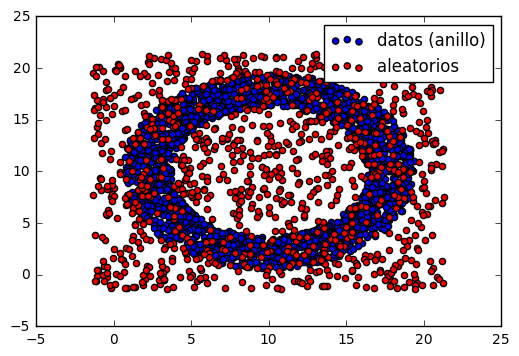

In [269]:
#Graficar anillo de datos y datos aleatorios
plt.scatter(x_d,y_d, label='datos (anillo)')
plt.scatter(d_rand(x_d,y_d,N2)[0],d_rand(x_d,y_d,N2)[1], c='r',label='aleatorios')
plt.legend(loc=0)

# D=R  y obtener que no hay correlacion:

In [357]:
#funcion normal de datos aleatorios
def drand(N2,L): #func data_random
    x_r=np.asarray([random.random() for i in range(N2)])*L 
    y_r=np.array([random.random() for i in range(N2)])*L
    return x_r,y_r

#Distancias:

#distancias datos DD
def DD(x,y,N1,D):
    for i in range(N1): 
        for j in range(i+1,N1):
            DD=dist(x[i],x[j],y[i],y[j]) #distancias
            indice1=int(DD//tbin)  #checar bin
          
            ContD[indice1]=ContD[indice1]+1 #Contador de indices
            
    #DD=ContD/D
           
    return ContD
            

            
#Distancias datos RR
def RR(xr,yr,N2,D):
    for i in range(N2):
    
        for j in range(i+1,N2):
            RR=dist(xr[i],xr[j],yr[i],yr[j])
            indice2=int(RR//tbin)  #checar bin
            ContR[indice2]=ContR[indice2]+1 #Contador de indices
    #RR=ContR/D
           
    return ContR
            
#Distancias DR
def DR(x,xr,y,yr,N1,N2,D):
    for i in range(N1):
    
        for j in range(N2):
            DR= dist(x[i],xr[j],y[i],yr[j])
            indice3=int(DR//tbin)      
            ContDR[indice3]=ContDR[indice3]+1
    #DR=ContDR/D
            
    return ContDR
            

In [332]:
N1=100
ND_D=N1*(N1-1)/2 #distancias datos

L=10
#arreglo de datos
x1=np.asarray([random.random() for i in range(N1)])*L 
y1=np.array([random.random() for i in range(N1)])*L

N2=N1
ND_R=N2*(N2-1)/2 #distancias datos
#arreglo aleatorio con los mismos elementos que los datos
xr,yr= drand(N2,L)

ND_DR=N1*N2


#definir arreglos de contador
ContD=np.zeros(nbins)
ContR=np.zeros(nbins)
ContDR=np.zeros(nbins)

In [333]:
DD=DD(x,y,N1,ND_D)
RR=RR(xr,yr,N2,ND_R)
DR=DR(x,xr,y,yr,N1,N2,ND_DR)



In [334]:
corrLZ= LZ(DD,RR,DR)
corrHEW= HEW(DD,RR,DR)
corrHAM= HAM(DD,RR,DR)
corrDP= DP(DD,RR,DR)

C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in divide
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in divide
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in divide
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in divide
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: invalid value encountered in divide
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in divide


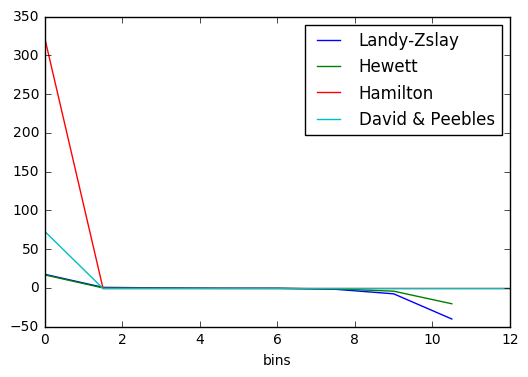

In [337]:
plt.plot(bins,corrLZ,label='Landy-Zslay')
plt.plot(bins,corrHEW,label='Hewett')
plt.plot(bins,corrHAM,label='Hamilton')
plt.plot(bins,corrDP,label='David & Peebles')
plt.legend(loc=0)
plt.xlabel('bins')

# Tomar R con N_R=5*N_D

In [341]:
N2=5*N1
ND_R=N1*(N1-1)/2 #distancias datos
#arreglo aleatorio con los mismos elementos que los datos
xr,yr= drand(N2,L)

ND_DR=N1*N2

In [342]:
#Parte de bins
DD=DD(x,y,N1,ND_D)
RR=RR(xr,yr,N2,ND_R)
DR=DR(x,xr,y,yr,N1,N2,ND_DR)

#estimadores
corrLZ= LZ(DD,RR,DR)
corrHEW= HEW(DD,RR,DR)
corrHAM= HAM(DD,RR,DR)
corrDP= DP(DD,RR,DR)

C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in divide
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in divide


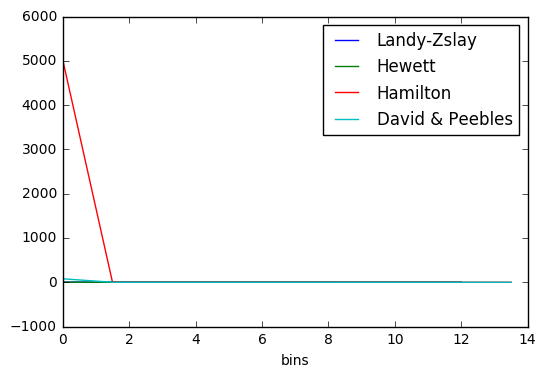

In [343]:
plt.plot(bins,corrLZ,label='Landy-Zslay')
plt.plot(bins,corrHEW,label='Hewett')
plt.plot(bins,corrHAM,label='Hamilton')
plt.plot(bins,corrDP,label='David & Peebles')
plt.legend(loc=0)
plt.xlabel('bins')

# Disco de radio R en caja lado L
## con N_R=5*N_D

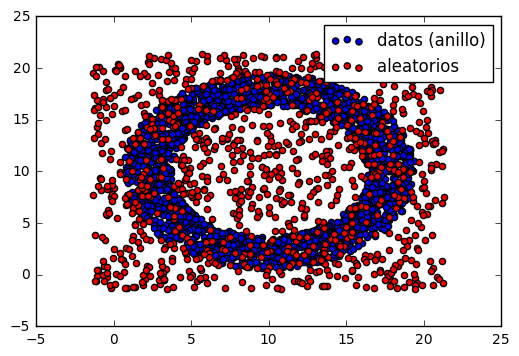

In [395]:
#Graficar anillo de datos y datos aleatorios
plt.scatter(x_d,y_d, label='datos (anillo)')
plt.scatter(d_rand(x_d,y_d,N2)[0]*L,d_rand(x_d,y_d,N2)[1]*L, c='r',label='aleatorios')
plt.legend(loc=0)

In [531]:
#funcion normal de datos aleatorios
def drand(N2,L): #func data_random
    x_r=np.asarray([random.random() for i in range(N2-1)])*L 
    y_r=np.array([random.random() for i in range(N2-1)])*L
    return x_r,y_r

#Distancias:

#distancias datos DD
def DD(x,y,N1,D):
    for i in range(N1): 
        for j in range(i+1,N1):
            DD=dist(x[i],x[j],y[i],y[j]) #distancias
            dis_DD.append(DD)
            
    #DD=ContD/D
           
    return dis_DD.append(DD)
            

            
#Distancias datos RR
def RR(xr,yr,N2,D):
    for i in range(N2):
    
        for j in range(i+1,N2):
            
            RR=dist(xr[i],xr[j],yr[i],yr[j])
            dis_RR.append(RR)
            
    #RR=ContR/D
           
    return dis_RR.append(RR)
            
#Distancias DR
def DR(x,xr,y,yr,N1,N2,D):
    for i in range(N1):
    
        for j in range(N2):
            DR= dist(x[i],xr[j],y[i],yr[j])
            dis_DR.append(DR)
    #DR=ContDR/D
            
    return dis_DR.append(DR)

#FUNCIONES

#funcion para obtener distancias
def dist(x_d,x_r,y_d,y_r):
    dis=np.sqrt((x_d - x_r)**2 + (y_d-y_r)**2)
    return dis

#estimador Landy-Zslay
def LZ(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrLZ= (corr_D+corr_R-2*corr_DR)/corr_R
    return corrLZ

#Estimador Hewett
def HEW(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrHEW= (corr_D-corr_DR)/corr_R
    return corrHEW

#Estimador David & Peebles
def DP(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrDP= (corr_D/corr_DR)-1
    return corrDP

#Estimador Hamilton
def HAM(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrHAM= (corr_D*corr_R)/(corr_DR)**2 -1
    return corrHAM
            

In [631]:
#funcion obtener distancias
def dist(x_d,x_r,y_d,y_r):
    dis=np.sqrt((x_d - x_r)**2 + (y_d-y_r)**2)
    return dis

L=20 #tamanio caja
np.random.seed(0)


#bins
bins=np.linspace(0.,np.sqrt(2.)*L,20)

#arreglo  datos disco en polares
N1=1000 #puntos de datos
ND_D=N1*(N1-1)/2 #distancias datos
ri=0.5 #radio interior
re=1. #radio exterior

c_x=0.0 #centrado x
c_y=0.0 #centrado y

r_ani=2*np.pi*np.random.uniform(ri,re,N1)#*L  #puntos sobre radio anillo
phi= 2 * np.pi * np.random.rand(N1) #angulo polares
x_d= r_ani*np.cos(phi)+c_x #coordenada x
y_d=r_ani*np.sin(phi)+c_y #coordenada y


#arreglo aleatorio 
N2=5*N1 #puntos aleatorios
ND_R=N2*(N2-1)/2 #distancias aleatorias


x_r = L*np.random.uniform(-1.,1.,N2)
y_r= L*np.random.uniform(-1.,1.,N2)


ND_DR=N1*N2 #distancias entre datos y aleatorios

dis_DD=[]
dis_RR=[]
dis_DR=[]


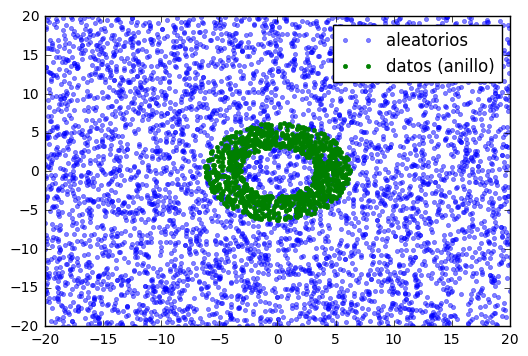

In [632]:
plt.plot(x_r,y_r,'.',label='aleatorios', alpha=0.5)
plt.plot(x_d,y_d,'.',label='datos (anillo)')
plt.legend()

In [650]:
#obtener distancias

#DD
for i in range(N1):
    for j in range(i+1,N1):
        dd = dist(x_d[i],x_d[j],y_d[i],y_d[j])
        dis_DD.append(dd)
#RR
for i in range(N2):
    for j in range(i+1,N2):
        rr = dist(x_r[i],x_r[j],y_r[i],y_r[j])
        dis_RR.append(rr)
#DR
for i in range(N1):
    for j in range(i+1,N2):
        dr = dist(x_d[i],x_r[j],y_d[i],y_r[j])
        dis_DR.append(dr) 



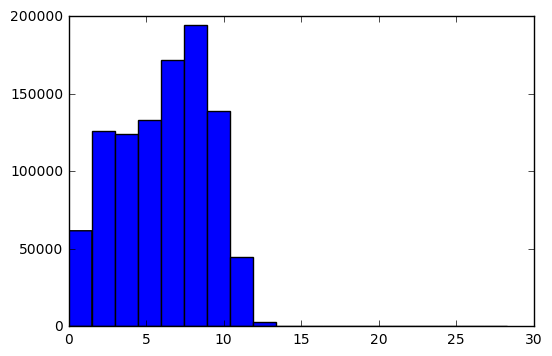

In [652]:
#hacer histogramas
#DD
d_DD, DD_bins,a= plt.hist(dis_DD,bins=bins) #organiza los datos


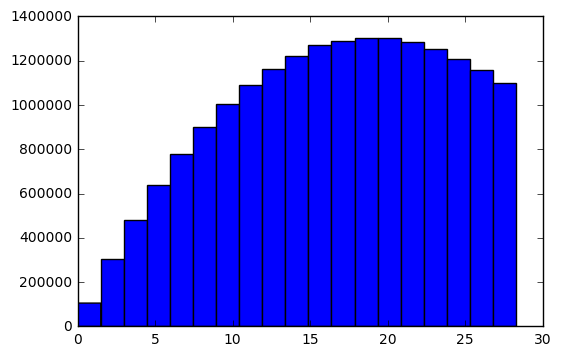

In [653]:
#hacer histogramas
#RR
d_RR, RR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

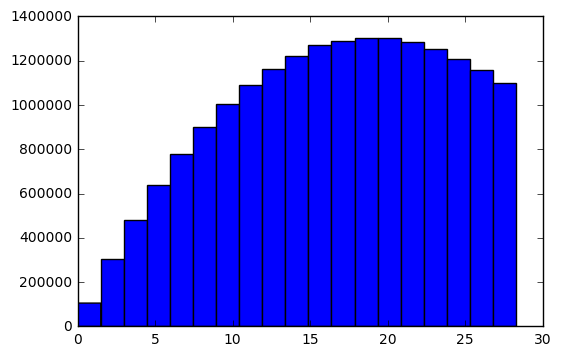

In [654]:
#hacer histogramas
#DR
d_DR, DR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

In [655]:
corr_D=d_DD/ND_D
corr_R=d_RR/ND_R
corr_DR=d_DR/ND_DR

In [656]:
#funciones de correlacion
name1='Landy-Szlay'
corr1= (corr_D+corr_R-2*corr_DR)/corr_R

name2='Hewett'
corr2= (corr_D-corr_DR)/corr_R

name3='David & Peebles'
corr3= (corr_D/corr_DR)-1

name4='Hamilton'
corr4= (corr_D*corr_R)/(corr_DR)**2 -1



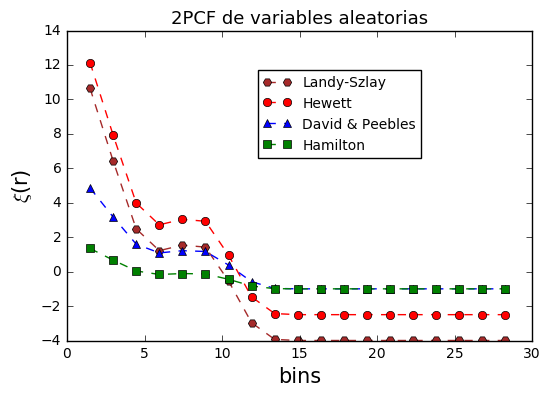

In [661]:
#Graficar

plt.plot(bins[1:],corr1,'--H',label=str(name1),color='brown')
plt.plot(bins[1:],corr2,'--o',label=str(name2),color='red')
plt.plot(bins[1:],corr3,'--g^',label=str(name3),color='blue')
plt.plot(bins[1:],corr4,'--s',label=str(name4),color='green')

plt.title('2PCF de variables aleatorias',fontsize=13)
plt.xlabel('bins',fontsize=15)
plt.ylabel(r'$\xi$(r)',fontsize=15)
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})

# 5 repeticiones

In [672]:
N1=300
N2=N1
Rept=5

#listas de coordenadas aleatorias
al_x=[]
al_y=[]

for i in range(Rept):
    x_r = L*np.random.uniform(-1.,1.,N2)
    y_r= L*np.random.uniform(-1.,1.,N2)
    al_x.append(x_r)
    al_y.append(y_r)

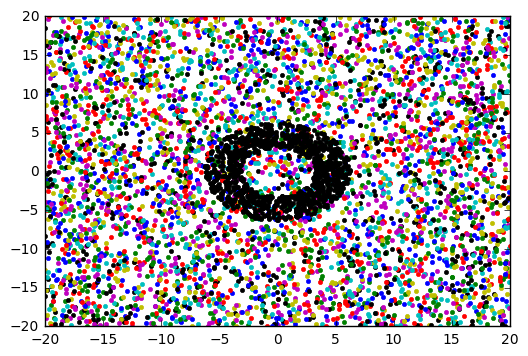

In [668]:
plt.plot(al_x,al_y,'.')
plt.plot(x_d,y_d,'.')

In [673]:
dis_DD=[]
dis_RR=[]
dis_DR=[]
al_x=[]
al_y=[]

In [674]:
#DD


for i in range(N1):
    for j in range(i+1,N1):
        dd = dist(x_d[i],x_d[j],y_d[i],y_d[j])
        dis_DD.append(dd)
#RR
for i in range(Rept):
    for i in range(N2):
        for j in range(i+1,N2):
            rr = dist(x_r[i],x_r[j],y_r[i],y_r[j])
            dis_RR.append(rr)
            al_x.append(x_r)
            al_y.append(y_r)
#DR
for i in range(N1):
    for j in range(i+1,N2):
        dr = dist(x_d[i],x_r[j],y_d[i],y_r[j])
        dis_DR.append(dr)

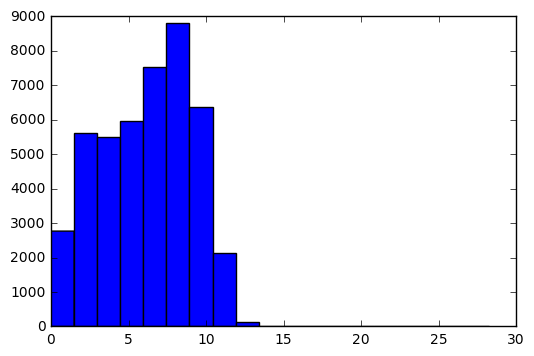

In [675]:
#hacer histogramas
#DD
d_DD, DD_bins,a= plt.hist(dis_DD,bins=bins) #organiza los datos


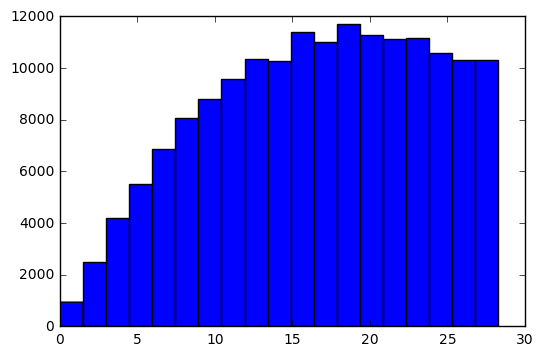

In [677]:
#hacer histogramas
#RR
d_RR, RR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

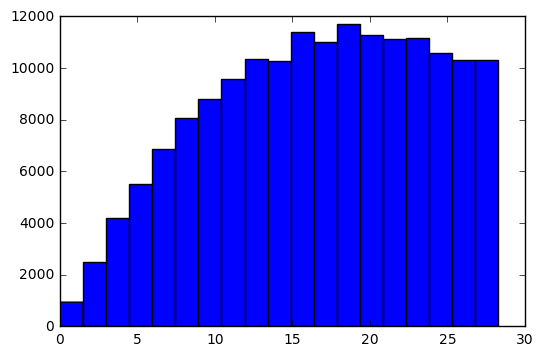

In [676]:
#hacer histogramas
#DR
d_DR, DR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

In [678]:
corr_D=d_DD/ND_D
corr_R=d_RR/ND_R
corr_DR=d_DR/ND_DR

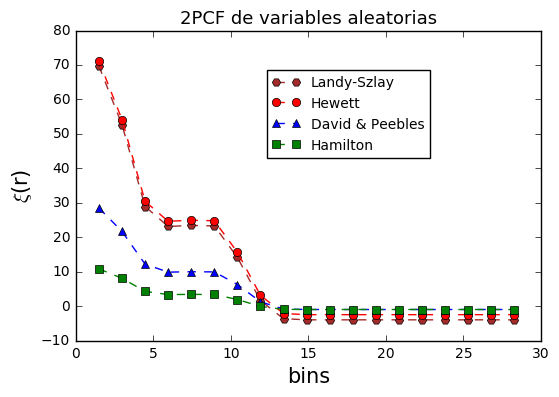

In [679]:
#funciones de correlacion
name1='Landy-Szlay'
corr1= (corr_D+corr_R-2*corr_DR)/corr_R

name2='Hewett'
corr2= (corr_D-corr_DR)/corr_R

name3='David & Peebles'
corr3= (corr_D/corr_DR)-1

name4='Hamilton'
corr4= (corr_D*corr_R)/(corr_DR)**2 -1

#Graficar

plt.plot(bins[1:],corr1,'--H',label=str(name1),color='brown')
plt.plot(bins[1:],corr2,'--o',label=str(name2),color='red')
plt.plot(bins[1:],corr3,'--g^',label=str(name3),color='blue')
plt.plot(bins[1:],corr4,'--s',label=str(name4),color='green')

plt.title('2PCF de variables aleatorias',fontsize=13)
plt.xlabel('bins',fontsize=15)
plt.ylabel(r'$\xi$(r)',fontsize=15)
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})

# Transf Fourier de ley de potencias:

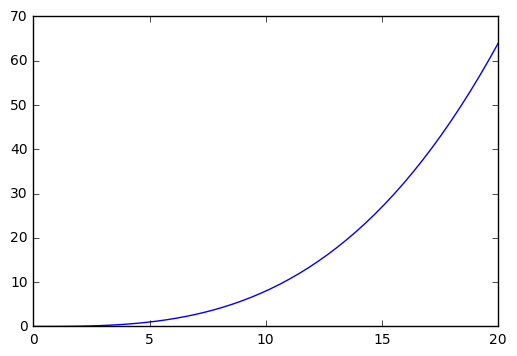

In [685]:
gamma=3.0
r0=5.0
#definir r
r=np.linspace(0.,20.,50)
#xi(r) ley de potencias
xi_r=(r/r0)**gamma
plt.plot(r,xi_r)

In [686]:
TFxi= np.fft.fft(xi_r)

C:\Users\Marco\Anaconda2\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


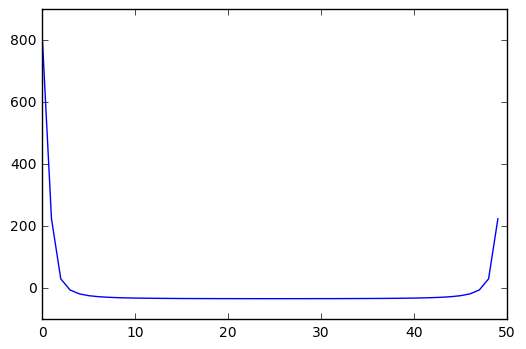

In [687]:
plt.plot(TFxi)